In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the CSV file into a data frame
df = pd.read_csv(r"C:\Users\computer\Desktop\BEATRICE\ML Journey\diabetes_prediction_dataset.csv")


In [52]:
print (df)
            
    
    

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [4]:
#Displaying the first few rows of the dataframe
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
#Displaying the last few rows of the dataframe
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
#Quick summary of the dataframe; columns, data types etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [56]:
#Checking how many unique entries are in each category
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [57]:
#Calculating the number of missing values in each column
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
#Calculating the percentage of missing values for each column
(df.isnull().sum()/(len(df)))*100

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

In [66]:
#Checking what unique values are in gender
df['gender'].unique()

array(['female', 'male', 'other'], dtype=object)

In [65]:
#Changing the gender into lower cases
df['gender']= df['gender'].str.strip().str.lower() 

In [8]:
#Checking how many entries fall in each gender: male, female and other
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [9]:
#Removing the other gender category
df=df[df['gender']!='other']

In [11]:
#Rechecking how many entries fall in each gender: expecting male, female 
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [70]:
#Checking how many unique entries are in each category
df.nunique()

gender                    2
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [71]:
#Checking for null values 
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [73]:
#Checking for duplicates
df.duplicated().sum()

3854

In [74]:
#Dropping the duplicates
df=df.drop_duplicates()

In [75]:
#Checking the data types in each column
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [77]:
#Describing the data
df.describe()
#results are showing numerical columns which are age, bmi, HbA1c level and blood glucose level. The hypertension, diabetes and
#heart diseases are categorical columns

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


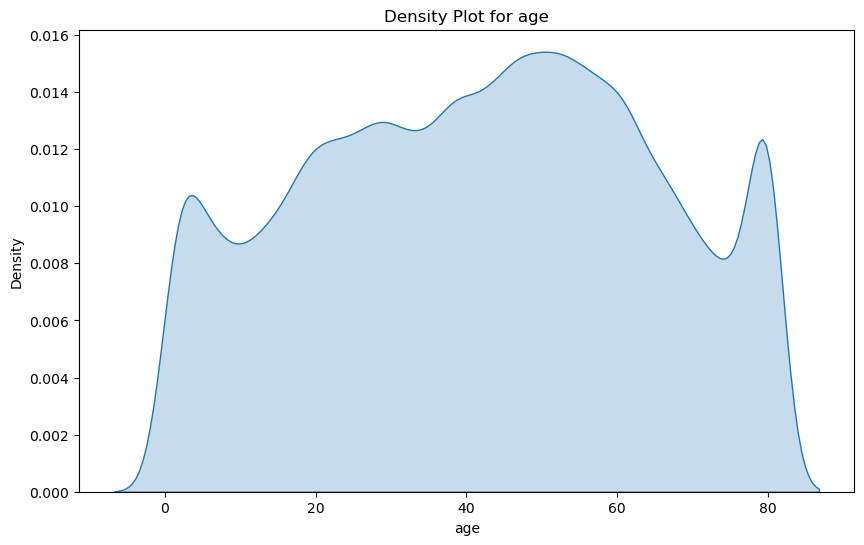

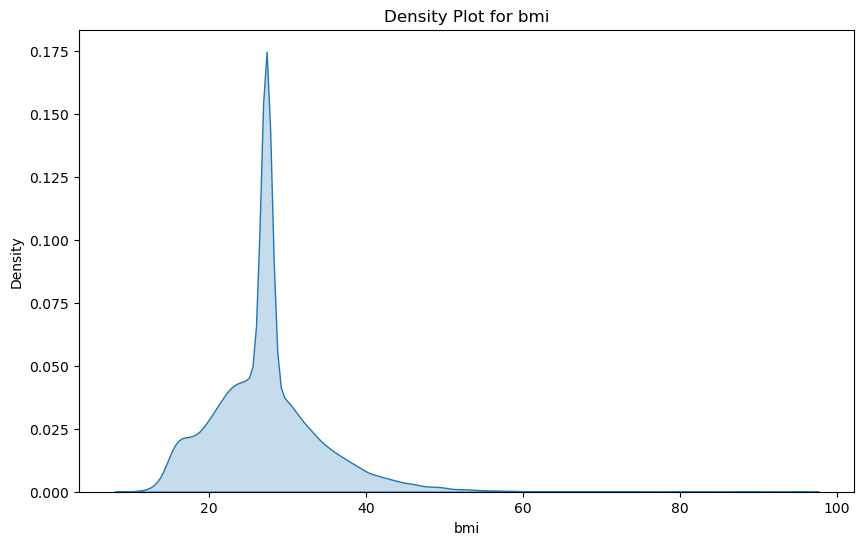

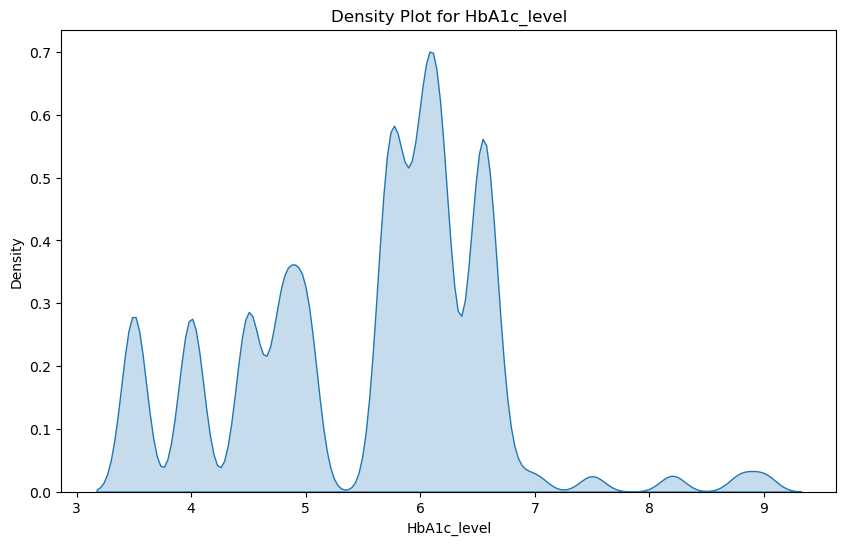

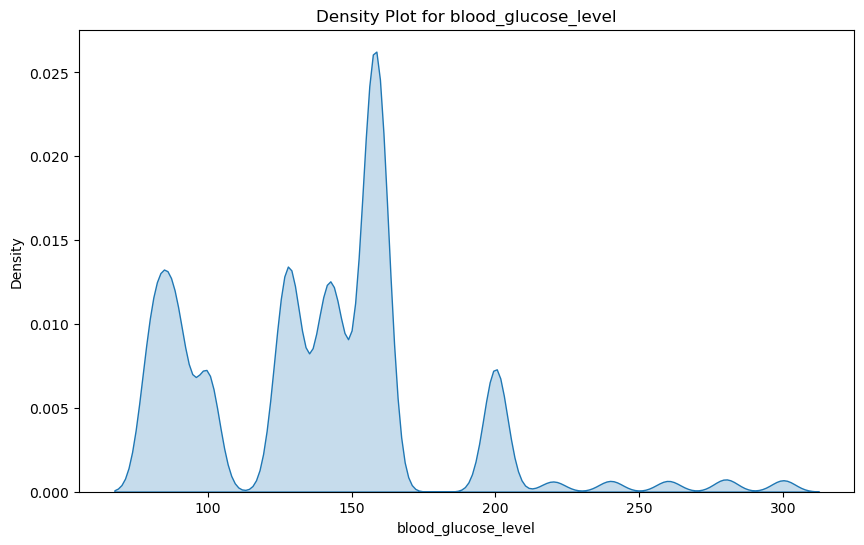

In [79]:
#To check for outliers in the numerical columns using density plots
numerical_columns=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for column in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.kdeplot(df[column], shade=True) #creates the density plot and shades under the density curve for better visualization
    plt.title(f"Density Plot for {column}") 
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show

TypeError: cannot unpack non-iterable bool object

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

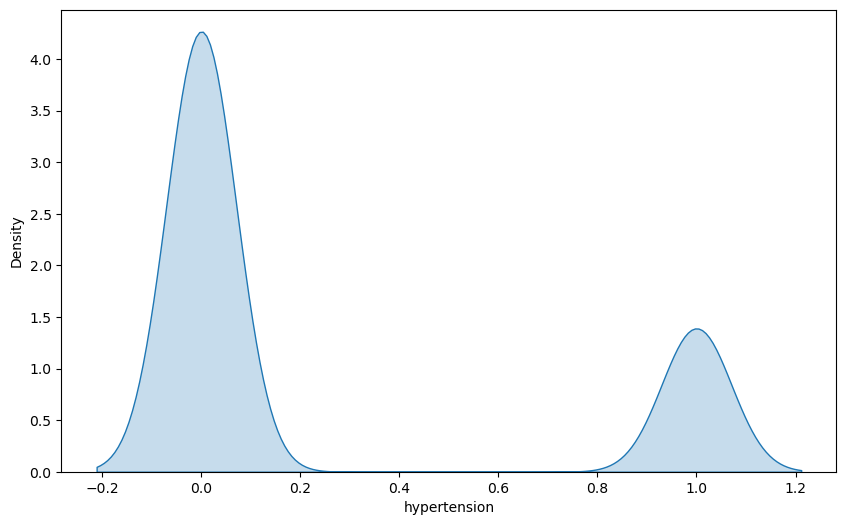

In [20]:
#We have multiple peaks under some columns, especially blood glucose levels and HbA1c levels 
# different HbA1c peaks indicates different levelsof glycemic control or types of diabetes management
# different blood glucose levels peaks are indicating different levels of  glucose control; well controlled & poorly controlled

#Now lets examine the group characteristics, comparing the density plots with the categorical variables e.g gender, diabetes etc
group1='Diabetic'
group2='Non-Diabetic'
categorical_columns =['gender', 'diabetes', 'heart_disease', 'hypertension']
for column in categorical_columns:
    plt.figure(figsize=(10,6))
sns.kdeplot(
        data=df[df['diabetes'] == 1][column], 
        label=group1, 
        shade=True
            )
label=group1, shade=True
sns.kdeplot(
        data=df[df['diabetes'] == 0][column], 
        label=group2, 
        shade=True
            ) 
label=group2, shade=True
plt.title(f"Density plot for {column} by Diabetes Status")
plt.xlabel(column)
plt.ylabel('Density')
plt.legend()
plt.show()
